EOSC211

project 1

student name and number: xuebin huang 21936661, maxime rousseau 76799170

sy0 = -3.0 Rp, closest altitude = 364.8 km
sy0 = -6.0 Rp, closest altitude = 300.7 km
sy0 = -12.0 Rp, closest altitude = 266.7 km
sy0 = -24.0 Rp, closest altitude = 248.9 km
sy0 = -48.0 Rp, closest altitude = 238.5 km
sy0 = -96.0 Rp, closest altitude = 238.2 km
sy0 = -192.0 Rp, closest altitude = 235.5 km
sy0 = -384.0 Rp, closest altitude = 227.6 km
sy0 = -768.0 Rp, closest altitude = 228.9 km
sy0 = -1536.0 Rp, closest altitude = 228.1 km
dt = 60.0 s, ac = 238.2 km, error = 22.16 %, elapsed = 0.012 s
dt = 30.0 s, ac = 214.7 km, error = 10.13 %, elapsed = 0.020 s
dt = 15.0 s, ac = 206.6 km, error = 5.93 %, elapsed = 0.041 s
dt = 7.5 s, ac = 202.4 km, error = 3.78 %, elapsed = 0.085 s
dt = 3.8 s, ac = 200.2 km, error = 2.66 %, elapsed = 0.181 s
dt = 1.9 s, ac = 199.1 km, error = 2.11 %, elapsed = 0.332 s
dt = 0.9 s, ac = 198.6 km, error = 1.83 %, elapsed = 0.674 s


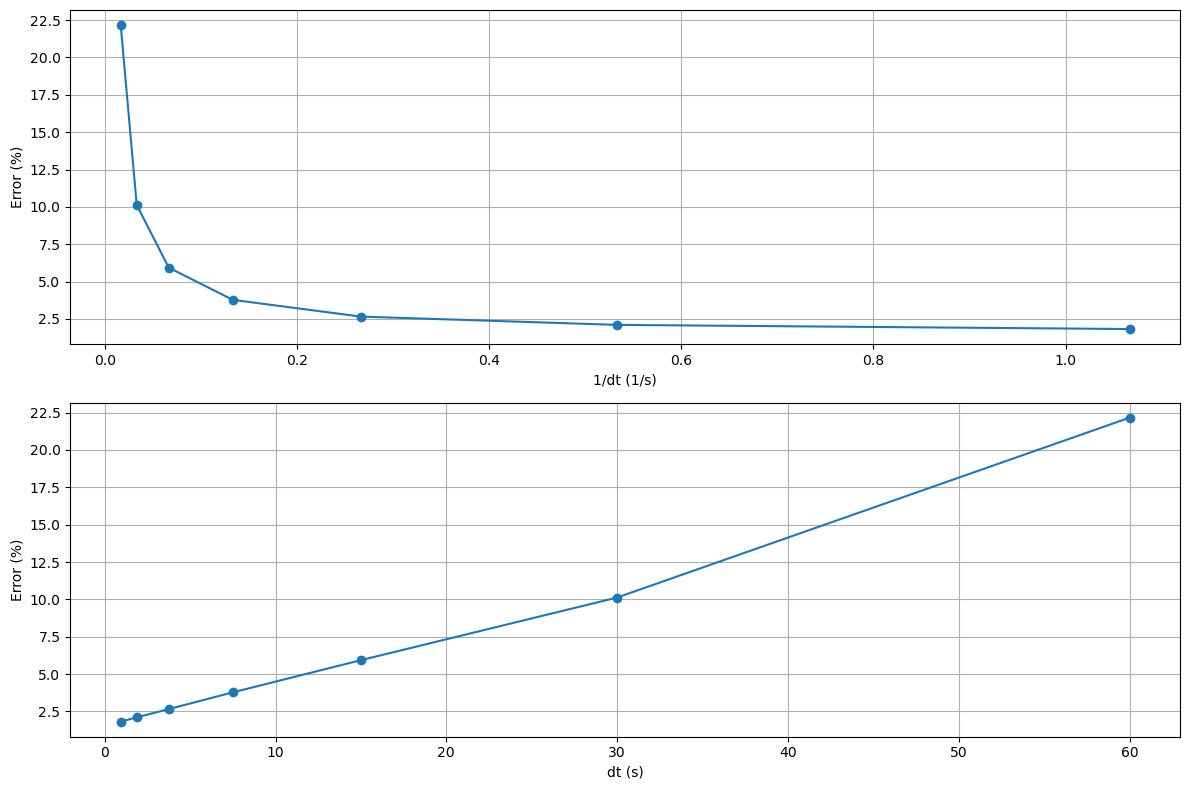

In [2]:
# Part 3B

import time
import matplotlib.pyplot as plt
import numpy as np
import flyby_fns as flyby

# Mercury and trajectory parameters (SI units)
Mp = 3.3e23       # kg
Rp = 2440e3       # 2440 km -> m

# i
sx0 = -3050e3
sy0 = -3 * Rp
tf = 40 * 60

for i in range(10):
    time_arr, acc_arr, vel_arr, pos_arr = flyby.get_traj(sx0, sy0, 0.0, 7e3, 60, tf, Mp, Rp)
    radius = np.sqrt(pos_arr[:,0]**2 + pos_arr[:,1]**2)
    altitude = radius - Rp
    ac = altitude.min() / 1e3
    print(f"sy0 = {sy0/Rp:.1f} Rp, closest altitude = {ac:.1f} km")
    sy0 *= 2 #double the value
    tf *= 2

# ii
sy0 = -96 * Rp
tf = 1280 * 60 # in units seconds
atarget = 195e3
dt = 60

errors, inv_dt, dt_list = [], [], []

while True:
    
    start = time.perf_counter()
    
    time_arr, acc_arr, vel_arr, pos_arr = flyby.get_traj(sx0, sy0, 0.0, 7e3, dt, tf, Mp, Rp)
    radius = np.sqrt(pos_arr[:,0]**2 + pos_arr[:,1]**2)
    altitude = radius - Rp
    ac = altitude.min()
    error = 100 * (ac - atarget) / atarget
    
    elapsed = time.perf_counter() - start

    print(f"dt = {dt:.1f} s, ac = {ac/1e3:.1f} km, error = {error:.2f} %, elapsed = {elapsed:.3f} s")

    errors.append(error)
    inv_dt.append(1/dt)
    dt_list.append(dt)

    if error <= 2:
        break
    dt /= 2

# Plot
fig, (ax_top, ax_bot) = plt.subplots(2,1,figsize=(12,8))
ax_top.plot(inv_dt, errors, marker='o')
ax_top.set_xlabel("1/dt (1/s)")
ax_top.set_ylabel("Error (%)")
ax_top.grid(True)

ax_bot.plot(dt_list, errors, marker='o')
ax_bot.set_xlabel("dt (s)")
ax_bot.set_ylabel("Error (%)")
ax_bot.grid(True)


plt.tight_layout()
plt.show()
